2개의 데이타프레임
df1 (사번, 이름)  df2 (사번, 월급)   => 사번 기준으로 통합하는 것 (merge)

(df1, df2)로 붙이기
df1
df2 
이렇게 붙일 수도 있음
왼쪽에 있는걸 left , 우측에 나오는걸 right

===== group by
df1 (사번, 팀, 개수)
=> group by 팀, '개수'의 합계

(팀,월, 개수)    => 팀 or 월로 묶을 수 있음
1,1,10
1,2,20
1,3, 5
2,1, 5
2, 2, 5
2, 2, 40


In [2]:
import pandas as pd
df = pd.read_csv("df0.csv")
df2 = pd.read_csv("df1.csv")

In [10]:
# df 는 날짜가 . / df2는 날짜가 - 로 구분
df["date2"] = df.date.str.replace(".","") # str 핖수, date2 필드 신규
df2["date2"] = df2.date.str.replace("-","") # str 핖수, date2 필드 신규


,date,value,change,date2
0,2023-03-01,1000,1.5,20230301
1,2023-03-02,1010,1.3,20230302
2,2023-03-05,1008,0.9,20230305
3,2023-03-05,1011,1.5,20230305
4,2023-03-09,1000,1.5,20230309
5,2023-03-10,1010,1.3,20230310
6,2023-03-14,1008,0.9,20230314
7,2023-03-14,1011,1.5,20230314


In [11]:
df.groupby(["date2"])["value2"].mean()

date2
20230301    10005.0
20230302    10103.0
20230305    10089.0
20230306    10115.0
20230309    10005.0
20230310    10103.0
20230312    10089.0
20230314    10115.0
Name: value2, dtype: float64

In [13]:
df3 = pd.DataFrame([[1,2], [1,3], [1,4]], columns=['a', 'b'])
df3

,a,b
0,1,2
1,1,3
2,1,4


In [14]:
# a를 기준으로 groupby 해서 b의 평균을 출력
df3.groupby("a")["b"].mean()

a
1    3.0
Name: b, dtype: float64

In [17]:

#df5 = pd.merge(df, df2, how="left", on="date2" )#왼쪽 데이터프레임(df)를 기준으로..
#how : { left, right, outer, inner, cross}, default inner
df5 = pd.merge(df, df2, how="left", left_on="date2", right_on="date2" )
df5

,date_x,value2,date2,date_y,value,change
0,2023.03.01,10005,20230301,2023-03-01,1000.0,1.5
1,2023.03.02,10103,20230302,2023-03-02,1010.0,1.3
2,2023.03.05,10089,20230305,2023-03-05,1008.0,0.9
3,2023.03.05,10089,20230305,2023-03-05,1011.0,1.5
4,2023.03.06,10115,20230306,NaN,NaN,NaN
5,2023.03.09,10005,20230309,2023-03-09,1000.0,1.5
6,2023.03.10,10103,20230310,2023-03-10,1010.0,1.3
7,2023.03.12,10089,20230312,NaN,NaN,NaN
8,2023.03.14,10115,20230314,2023-03-14,1008.0,0.9
9,2023.03.14,10115,20230314,2023-03-14,1011.0,1.5


In [ ]:
df5.dropna()#원본에 미적용,원본에 적용하려면 inplace=True
#=> 이거는 inner 와 동일함

a, b
1
3
4

a, c
1
3
5

1. 양쪽에 나오는거 

2. 왼쪽 기준
a, b, c
1     
3
4      N/a

3. 오른쪽 기준 => 잘 안씀음.. (왼쪽으로 놓고 쓰면 되니깐)
4. 가능한거 다


In [18]:
pd.concat( [df, df2, df], axis=1 ) # axis = 0 위아래, axis =1 옆으로

,date,value2,date2,date,value,change,date2,date,value2,date2
0,2023.03.01,10005,20230301,2023-03-01,1000,1.5,20230301,2023.03.01,10005,20230301
1,2023.03.02,10103,20230302,2023-03-02,1010,1.3,20230302,2023.03.02,10103,20230302
2,2023.03.05,10089,20230305,2023-03-05,1008,0.9,20230305,2023.03.05,10089,20230305
3,2023.03.06,10115,20230306,2023-03-05,1011,1.5,20230305,2023.03.06,10115,20230306
4,2023.03.09,10005,20230309,2023-03-09,1000,1.5,20230309,2023.03.09,10005,20230309
5,2023.03.10,10103,20230310,2023-03-10,1010,1.3,20230310,2023.03.10,10103,20230310
6,2023.03.12,10089,20230312,2023-03-14,1008,0.9,20230314,2023.03.12,10089,20230312
7,2023.03.14,10115,20230314,2023-03-14,1011,1.5,20230314,2023.03.14,10115,20230314


In [20]:
import pandas as pd

df = pd.read_excel('OnlineRetail2.xlsx')#출처: UCI machine learning databases
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    29999 non-null  object        
 1   StockCode    29999 non-null  object        
 2   Description  29885 non-null  object        
 3   Quantity     29999 non-null  int64         
 4   InvoiceDate  29999 non-null  datetime64[ns]
 5   UnitPrice    29999 non-null  float64       
 6   CustomerID   19956 non-null  float64       
 7   Country      29999 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.8+ MB


In [23]:
df.Quantity.astype("str").astype("int")

0        6
1        6
2        8
3        6
4        6
        ..
29994    3
29995    1
29996    2
29997    1
29998    1
Name: Quantity, Length: 29999, dtype: int64

In [28]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')		
#고객 ID 별로, 제품별 몇개 팔렸는지
df['Description'] = df['Description'].str.strip()	#Description 컬럼의 문자열 앞뒤 공백 정리, 가운데는 안 지움

In [40]:
abc = df['InvoiceNo'].str.contains('C') # C를 포함한 문자 , C 포함 : 취소 
df = df[~df['InvoiceNo'].str.contains('C')]		#InvoiceNo 중 정상적이지 않은 거래 건(C문자 포함 거래) 제외
#df[abc]
#df[~abc]

In [31]:
# 날짜 형식으로 변경
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [42]:
grouped = df.groupby(['InvoiceNo', 'Description'])['Quantity']

In [43]:
grouped.mean()
grouped.mean().unstack().fillna(0)

Description,*Boombox Ipod Classic,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,amazon,check,damages,faulty
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# group by
# 기준 : country, description,
# 요약값 : unitprice의 최대값
df.info()
df.groupby(['Country', 'Description'])['UnitPrice'].max().unstack().fillna(0)

<class 'pandas.core.frame.DataFrame'>
Index: 29505 entries, 0 to 29998
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    29505 non-null  object        
 1   StockCode    29505 non-null  object        
 2   Description  29391 non-null  object        
 3   Quantity     29505 non-null  int64         
 4   InvoiceDate  29505 non-null  datetime64[ns]
 5   UnitPrice    29505 non-null  float64       
 6   CustomerID   19498 non-null  float64       
 7   Country      29505 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.0+ MB


Description,*Boombox Ipod Classic,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,amazon,check,damages,faulty
Country,,,,,,,,,,,,,,,,,,,,,
Australia,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
Belgium,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
Channel Islands,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
Cyprus,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.65,...,0.00,0.00,1.25,0.00,0.00,0.00,0.0,0.0,0.0,0.0
Denmark,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
EIRE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.65,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
France,0.00,0.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
Germany,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.65,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
Iceland,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0


In [47]:
df.groupby(['Country', 'Description'])['UnitPrice'].max().unstack().fillna(0)#.reset_index().set_index('InvoiceNo')

KeyError: "None of ['InvoiceNo'] are in the columns"

In [48]:
#basket 형태로 변경
# 두 컬럼을 기준으로 Quantity값을 정리/ 합계구하고, 형태 변환 / index새로 생성/NaN값은0변환 / InvoiceNo으로 index 설정
basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
basket

Description,*Boombox Ipod Classic,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,amazon,check,damages,faulty
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
#binarize
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

type(basket)

#전체 자료에 함수 적용
basket_sets = basket.applymap(encode_units) # column 에 적용
basket_sets.columns
basket_sets

Description,*Boombox Ipod Classic,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,amazon,check,damages,faulty
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#pivot
import pandas as pd
df1 = pd.DataFrame( {'x':['A','B', 'C', 'D', 'E', 'F'], 'y':[2021,2021,2021,2022,2022,2022], 'z':[1,2,3,4,5,6]})
print(df1)

   x     y  z
0  A  2021  1
1  B  2021  2
2  C  2021  3
3  D  2022  4
4  E  2022  5
5  F  2022  6


In [51]:
df1.pivot(index='x',columns='y', values='z').fillna(0) #index 중복 없어야 함.
#y컬럼의 값이 같은 상황에서 x컬럼의 값이 중복되면 안됨

y,2021,2022
x,,
A,1.0,0.0
B,2.0,0.0
C,3.0,0.0
D,0.0,4.0
E,0.0,5.0
F,0.0,6.0


In [52]:
import seaborn as sns
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [53]:
df = flights.pivot('month', 'year', 'passengers') #행, 열 지정, 값 지정
df.head()

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
tips = sns.load_dataset("tips")
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


time      Lunch     Dinner
day                       
Thur  17.664754  18.780000
Fri   12.845714  19.663333
Sat    0.000000  20.441379
Sun    0.000000  21.410000


<Axes: xlabel='time', ylabel='day'>

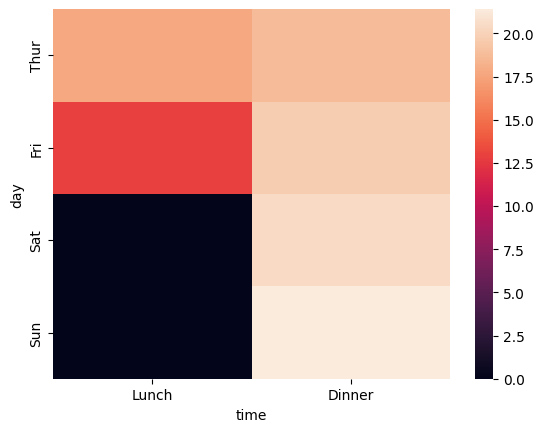

In [64]:
# 1. tips에서 day와 time으로 groupby , total_bill 평균을 출력, 히트맵
gtips = tips.groupby(["day","time"])["total_bill"].mean().unstack().fillna(0)
print(gtips)
sns.heatmap(gtips)

In [60]:
#2 . between을 이용, tip 2이상, 3이하인 행을 출력
idx = tips["tip"].between(2, 3)
tips[ idx ]

,total_bill,tip,sex,smoker,day,time,size
6,8.77,2.00,Male,No,Sun,Dinner,2
13,18.43,3.00,Male,No,Sun,Dinner,4
21,20.29,2.75,Female,No,Sat,Dinner,2
22,15.77,2.23,Female,No,Sat,Dinner,2
25,17.81,2.34,Male,No,Sat,Dinner,4
...,...,...,...,...,...,...,...
231,15.69,3.00,Male,Yes,Sat,Dinner,3
234,15.53,3.00,Male,Yes,Sat,Dinner,2
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [74]:
#3. 일요일에 저녁시사를 한 경우 total_bill 이 가장 큰 3개
sdt = tips[(tips['day']=="Sun") & (tips['time']=='Dinner')]
sdt.head(5)
sdt.nlargest(3, "total_bill") # 데이타 중에서 제일 큰값

,total_bill,tip,sex,smoker,day,time,size
156,48.17,5.0,Male,No,Sun,Dinner,6
182,45.35,3.5,Male,Yes,Sun,Dinner,3
184,40.55,3.0,Male,Yes,Sun,Dinner,2


# 클러스터링
사람, 시간 용돈
A 6,1
B 1, 5
C 1.2 6

각 사람별 거리를 측정 (uclid 거리) -> dendrogram 이 완성 됨
각각 잘라놓으면 클러스터링
하나씩 묶으면 계층적 클러스터링 = hierachical clustering = agglomerative

In [75]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [76]:
# 거리를 구하려면 숫자데이타만 이용
dia = diamonds[['carat','price']]
from sklearn.cluster import AgglomerativeClustering, KMeans
AgglomerativeClustering().fit(dia)

AgglomerativeClustering()

In [ ]:
# 범주에 대해서는 어떻게 구하나? ex ) (사과 바나나),  (바나나 오렌지)
# 비지도 학습 = 정답이 없음 = 예측을 하지 않음 = 오류가 없음 == 인사이트를 얻는데 사용
# 아웃라이어에 영향을 좀 받을 수 있음
# 다이아그램이 있어 이해하기는 쉬움. 
# 데이타가 많으면 오래 걸림


In [78]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
data = pd.read_csv('fa_data_bfi.csv')

In [80]:
from IPython.display import display
display(data.head())
print('\n', data.shape)
data.describe()

,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess
0,-0.439830,0.103897,-1.216713,-0.696215,-1.519449
1,0.084369,0.559311,-0.601521,-0.189341,-0.248384
2,0.520534,0.318235,0.025646,-0.751136,0.204503
3,-0.197064,0.057696,-1.019263,0.064286,-1.029492
4,-0.329835,0.408754,-0.058843,-0.820454,-0.691042



 (2436, 5)


,Neuroticism,Extraversion,Conscientiousness,Agreeableness,Openess
count,2.436000e+03,2.436000e+03,2.436000e+03,2.436000e+03,2.436000e+03
mean,1.895947e-17,-1.166737e-17,2.333474e-17,4.448184e-17,-3.646053e-17
std,9.236532e-01,8.771326e-01,8.628192e-01,8.445489e-01,8.271759e-01
min,-2.900034e+00,-2.964398e+00,-3.086888e+00,-3.611214e+00,-3.260500e+00
25%,-7.210416e-01,-5.274507e-01,-5.533678e-01,-4.973700e-01,-5.699871e-01
50%,-5.976721e-02,7.642778e-02,7.095942e-02,1.261594e-01,2.820526e-02
75%,6.603891e-01,6.468802e-01,6.344018e-01,6.057907e-01,6.193536e-01
max,2.738694e+00,2.461448e+00,1.941907e+00,2.179653e+00,2.011314e+00


In [87]:
data_prime = data.copy()
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

clusters = linkage(y=data_prime, method='complete')

In [91]:
from time import time
import numpy as np
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target


In [94]:
X.shape

(150, 4)

In [92]:
from sklearn.cluster import AgglomerativeClustering
hclust = AgglomerativeClustering(linkage='ward', n_clusters=10) # cluster 10개 찾아줘
#n_clusters 클러스터 개수, 초기값 2
#affinity 거리 측정 방식, 기본값 euclidean
#linkage ward, complete, average, 기본값은 ward (ward는 거리가 euclidean에서 가능)

hclust.fit(X)
#hclust.fit_predict(X)
#hclust.get_params()
hclust.labels_	#각 자료에 대한 클러스터 결과

array([9, 5, 5, 5, 9, 3, 5, 9, 5, 5, 3, 5, 5, 5, 3, 3, 3, 9, 3, 9, 3, 9,
       5, 9, 5, 5, 9, 9, 9, 5, 5, 3, 3, 3, 5, 5, 3, 9, 5, 9, 9, 5, 5, 9,
       9, 5, 9, 5, 3, 9, 8, 6, 8, 0, 8, 0, 6, 7, 8, 0, 7, 6, 0, 6, 0, 8,
       0, 0, 2, 0, 6, 6, 2, 6, 6, 8, 8, 4, 6, 0, 0, 0, 0, 2, 0, 6, 8, 2,
       0, 0, 0, 6, 0, 7, 0, 0, 0, 6, 7, 0, 4, 2, 1, 4, 4, 1, 0, 1, 4, 1,
       4, 4, 4, 2, 2, 4, 4, 1, 1, 2, 4, 2, 1, 2, 4, 1, 2, 6, 4, 1, 1, 1,
       4, 2, 2, 1, 4, 4, 6, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 6])

In [98]:
# credit 파일 읽어서 , loan, income, age 만 선택
# scaling standard
# agglomerativeclustering 5개
# 몇번째 클러스터인지 결과 값을 cluster 컬럼에 추가
#
credit = pd.read_csv('creditset.csv')
credit = credit[["loan", "income", "age"]]
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   loan    2000 non-null   float64
 1   income  2000 non-null   float64
 2   age     2000 non-null   float64
dtypes: float64(3)
memory usage: 47.0 KB


In [108]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
scredit = pd.DataFrame(scaler.fit_transform(credit), columns=credit.columns)

In [113]:
credit_clust = AgglomerativeClustering(linkage='ward', n_clusters=5) # cluster 10개 찾아줘
credit_clust.fit(scredit)

scredit["cluster"] = credit_clust.labels_
#credit_clust.labels_
scredit.cluster.value_counts()
scredit[scredit.cluster== 4 ].mean()


loan      -0.729665
income     0.398479
age        0.925868
cluster    4.000000
dtype: float64

In [115]:
scredit.head(5)


,loan,income,age,cluster
0,1.202819,1.453934,1.364333,1
1,0.696427,-0.762176,0.542268,1
2,1.174711,0.836821,1.672877,1
3,0.544980,-0.183070,0.363887,1
4,1.420765,1.509563,-1.685088,0


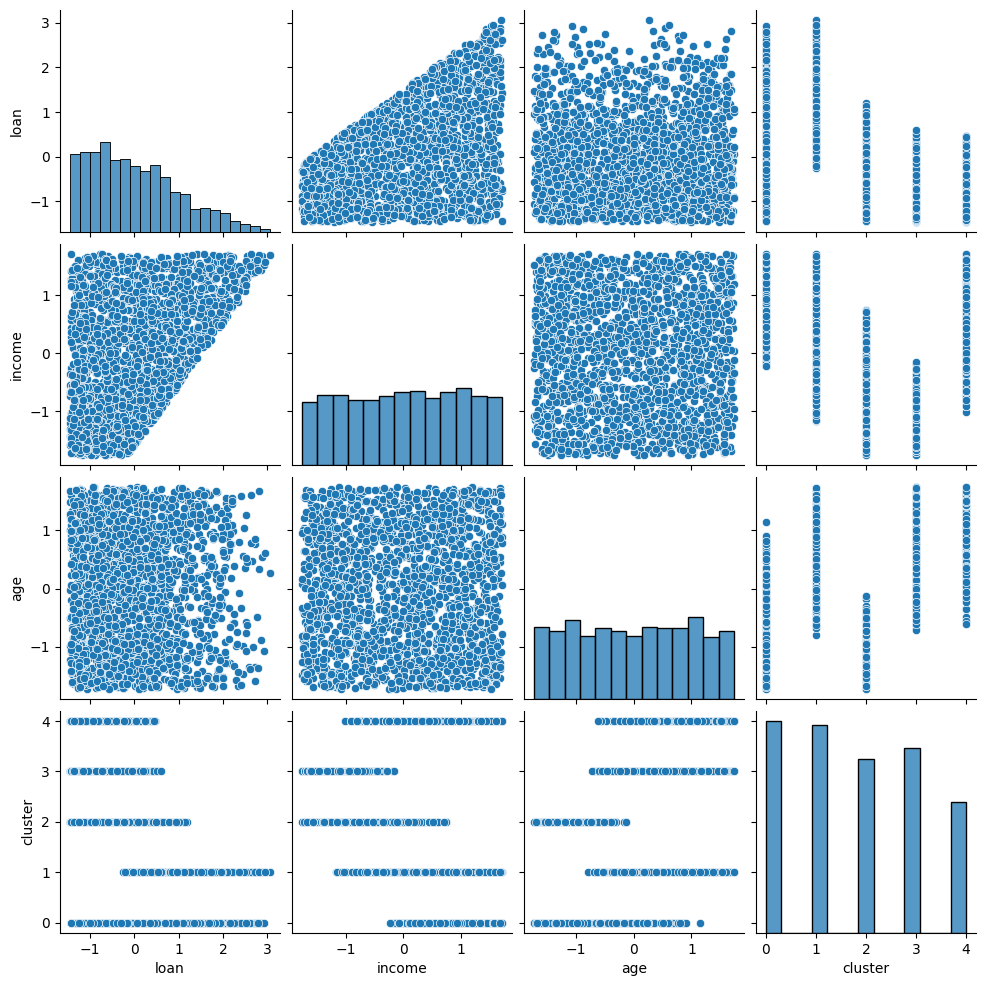

In [117]:
from sklearn.cluster import KMeans

kc = KMeans(n_clusters=5).fit(scredit.drop("cluster", axis=1))
kc.labels_
sns.pairplot(scredit)

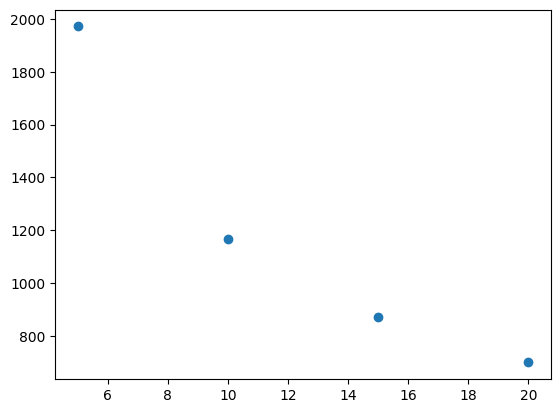

In [122]:
kc.cluster_centers_
kc.inertia_
# inertia 값은 작을 수록 좋긴 하지만, 가장 작은건 n-1 개 cluster이기 때문에 적당한값을 찾아야 함
# elbow method를 찾아서 적정값을 찾아 써야 함
x = [5,10,15,20]
y=[]
for i in x:
    tmp = KMeans(n_clusters=i).fit(scredit.drop("cluster", axis=1))
    #print(tmp.inertia_)
    y.append(tmp.inertia_)
    
import matplotlib.pyplot as plt
plt.scatter(x,y)
    

In [128]:
kc = KMeans(n_clusters=5).fit(scredit.drop("cluster", axis=1))
kc.labels_
scredit["kmeans"] = kc.labels_
scredit

,loan,income,age,cluster,kmeans
0,1.202819,1.453934,1.364333,1,1
1,0.696427,-0.762176,0.542268,1,2
2,1.174711,0.836821,1.672877,1,1
3,0.544980,-0.183070,0.363887,1,1
4,1.420765,1.509563,-1.685088,0,3
...,...,...,...,...,...
1995,-0.826907,0.969747,0.572514,4,4
1996,-0.309130,1.688540,-1.339834,0,4
1997,0.354201,-0.071226,-0.973667,0,3
1998,-0.926756,-0.110003,1.738021,4,2


In [ ]:
# grid search : 시간이 많이 걸림
# random search : 잘 걸리면 좋음
# 두개를 혼합해서 사용



패턴 : 빈번하게 같이 발생하는 아이템의 쌍
장바구니 분석 : item (제품), transaction(거래내역)
1. 우유, 과자
2. 우유, 과자, 콜라
3. 과자, 콜라
4. 우유, 과자
====> 과자를 다 사네
과자 4/4 , 우유 3/4

==> 패턴
우유, 과자 3/4
과자, 콜라 2/4
==> support

apriori : 트랜잭션에서 support 생성
3c2 구함, 계산 비용이 크다

fpgrowth (frequent pattern ) : 빠르다 

지지도 : 두개를, 세개를 같이 살 확률
신뢰도 : 우유 산사람 중에 우유랑 과자 산 사람 (조건부 확률)
향상도 : (우유,과자 )살 확률 / 우유 살 확률 *  과자 살 확률  : 1에 가까울 수록 좋음


In [130]:
# !pip3 install mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth


In [ ]:
# 
#1. 우유, 과자
#2. 우유, 과자, 콜라
#3. 과자, 콜라
#4. 우유, 과자
# ==> 전환 , 효율적인 값으로 만들어주는 과정 = encoding  : transactionEncoder 사용
# 1 1,1,0
#2 1,1,1
#3 1,0,1
#4 1,1,0

#=== 아래를 위에처럼 만드는 것 groupby or pivot 사용
#1 우유
#1 과장
#2 우유
#2 과자
#2 콜라




In [133]:
chip = pd.read_csv('chipotle.tsv', delimiter='\t', header=0) # 첫번째줄이 헤더다
chip.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [139]:
def func1(x):
    if(x<=0.0):
        return False
    else:
        return True
    
func1(0.7)

True

In [140]:
#chip.groupby (["order_id", "item_name"])["quantity"].sum().unstack().fillna(0)
chip.groupby (["order_id", "item_name"])["quantity"].sum().unstack().fillna(0).applymap(func1)
#chip.head()

item_name,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
order_id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1831,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [170]:
#data3.csv를 읽어서 artist 컬럼에 대해서 strip() 적용 (앞뒤 공백 제거)
# user_id 를 str 로 변환
# artist랑 user_id 를 기준 qty를 value로 groupby . sum()
# 데이타 프레임으로 변환, na값은 0, func1을 전체값에다 적용

d3 = pd.read_csv('data_3.csv')
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    19999 non-null  int64 
 1   artist  19999 non-null  object
 2   qty     19999 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 468.9+ KB


In [171]:

d3['artist'] = d3['artist'].str.strip()	#artist  컬럼의 문자열 앞뒤 공백 정리, 가운데는 안 지움
d3['user'] = d3['user'].astype('str')		

In [177]:
rd3 = d3.groupby(['user', 'artist'])['qty'].sum().unstack().fillna(0).applymap(func1)
rd3.head()


artist,...and you will know us by the trail of dead,2pac,3 doors down,30 seconds to mars,311,36 crazyfists,44,50 cent,65daysofstatic,[unknown],...,wilco,within temptation,wolfgang amadeus mozart,wu-tang clan,yann tiersen,yeah yeah yeahs,yellowcard,yo la tengo,zero 7,Édith piaf
user,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1005,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1007,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [178]:
#tmp1 = apriori(rd3, min_support=0.05, use_colnames=True)
tmp1 = fpgrowth(rd3, min_support=0.05, use_colnames=True)

In [179]:
association_rules(tmp1, metric='confidence', min_threshold=0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(radiohead),(coldplay),0.201780,0.149357,0.065282,0.323529,2.166147,0.035145,1.257472,0.674440
1,(coldplay),(radiohead),0.149357,0.201780,0.065282,0.437086,2.166147,0.035145,1.418014,0.632875
2,(radiohead),(the beatles),0.201780,0.190900,0.071217,0.352941,1.848827,0.032697,1.250427,0.575176
3,(the beatles),(radiohead),0.190900,0.201780,0.071217,0.373057,1.848827,0.032697,1.273193,0.567441


In [180]:
patterns = association_rules(tmp1, metric='confidence', min_threshold=0.1)
patterns.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(radiohead),(coldplay),0.201780,0.149357,0.065282,0.323529,2.166147,0.035145,1.257472,0.674440
1,(coldplay),(radiohead),0.149357,0.201780,0.065282,0.437086,2.166147,0.035145,1.418014,0.632875
2,(radiohead),(the beatles),0.201780,0.190900,0.071217,0.352941,1.848827,0.032697,1.250427,0.575176
3,(the beatles),(radiohead),0.190900,0.201780,0.071217,0.373057,1.848827,0.032697,1.273193,0.567441


In [181]:
#support 기준을 0.01, confidence 0.05로 바꿔서 결과가 나오면 
# lift 기준 내림차순 3개만 출력
tmp1 = fpgrowth(rd3, min_support=0.01, use_colnames=True)
patterns = association_rules(tmp1, metric='confidence', min_threshold=0.05)
patterns.sort_values(by='lift', ascending=False).head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4093,(the game),(snoop dogg),0.013848,0.024728,0.01088,0.785714,31.774286,0.010538,4.551269,0.982128
4092,(snoop dogg),(the game),0.024728,0.013848,0.01088,0.440000,31.774286,0.010538,1.760986,0.993085
3343,(scooter),(cascada),0.020772,0.020772,0.01088,0.523810,25.217687,0.010449,2.056380,0.980716


In [199]:
# chipotle.tsv 에 대해 패턴을 발견해보세요
# 사용  order_id, itemname, quantity
chip = pd.read_csv('chipotle.tsv', delimiter='\t', header=0)
chip.info()
chip['order_id'] = chip['order_id'].astype('str')
chip['item_name'] = chip['item_name'].str.strip()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [200]:
rchip = chip.groupby(['order_id','item_name'])['quantity'].count().unstack().fillna(0).applymap(func1)


In [201]:
tmp2 = fpgrowth(rchip, min_support=0.05, use_colnames=True)


In [202]:
pat = association_rules(tmp2, metric='confidence', min_threshold=0.1)
pat.sort_values(by='lift', ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(Chips),(Chicken Bowl),0.113413,0.335333,0.066521,0.586538,1.749124,0.028490,1.607568,0.483072
7,(Chicken Bowl),(Chips),0.335333,0.113413,0.066521,0.198374,1.749124,0.028490,1.105985,0.644360
5,(Chicken Bowl),(Canned Soft Drink),0.335333,0.150491,0.060523,0.180488,1.199328,0.010059,1.036604,0.250050
4,(Canned Soft Drink),(Chicken Bowl),0.150491,0.335333,0.060523,0.402174,1.199328,0.010059,1.111807,0.195642
1,(Chips and Guacamole),(Chicken Bowl),0.258451,0.335333,0.081243,0.314346,0.937416,-0.005424,0.969392,-0.082595


# 그래프
소셜 네트워크 
그래프 : 연결된 상태를 나타내는 것
1. 누가 연결이 제일 많은지 확인(중심적인 사람)
2. 조직의 특성을 파악함
3. 링크 prediction (이걸 이제 많이 하게 됨)

GNN (graph neural network)

그래프 = ( 노드, edge)
O : 노드, vertex (vertices)
선 : edge, link, relationship
=> 컴퓨터 한테는 matrix로 표현
adjacency matrix ( 방향성이 있으면 대칭 적이지 않다, 없으면 대칭)
  a b c d
a
b
c
d

친구 관계 = 방향성 없음 (undirected graph)
돈빌려줌 = 방향성 있음 (directed graph)

In [203]:
Fruits = ['apple', 'banana', 'kiwi', 'mango']
relations = [('apple', 'banana'), ('kiwi', 'apple'), ('mango', 'apple'), ('mango', 'banana')]


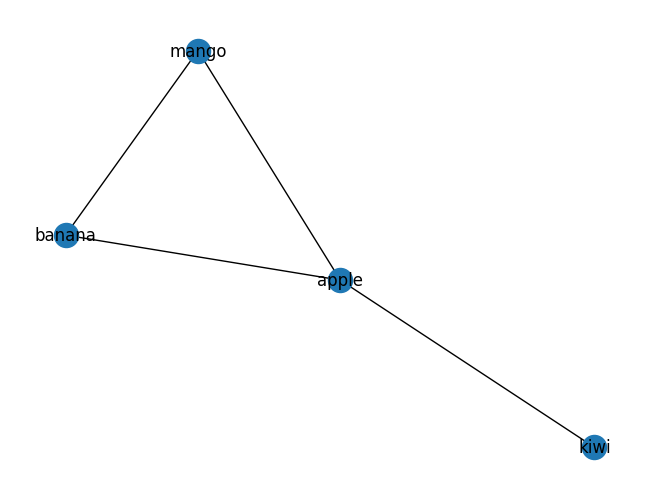

In [204]:
import networkx as nx
import matplotlib.pyplot as plt

# Graph 생성
G = nx.Graph()

# Node (vertex) 생성
G.add_nodes_from(Fruits)

# Edge (link) 생성
G.add_edges_from(relations)  # graph에 속한 모든 node들이 edgelist에 포함된 경우 add_nodes_from() 과정을 생략할 수 있음

nx.draw(G, with_labels=True)
plt.show()

In [207]:
G.nodes
G.edges
print(G)

Graph with 4 nodes and 4 edges


DegreeView({'A': 3, 'B': 1, 'C': 1, 'D': 1})

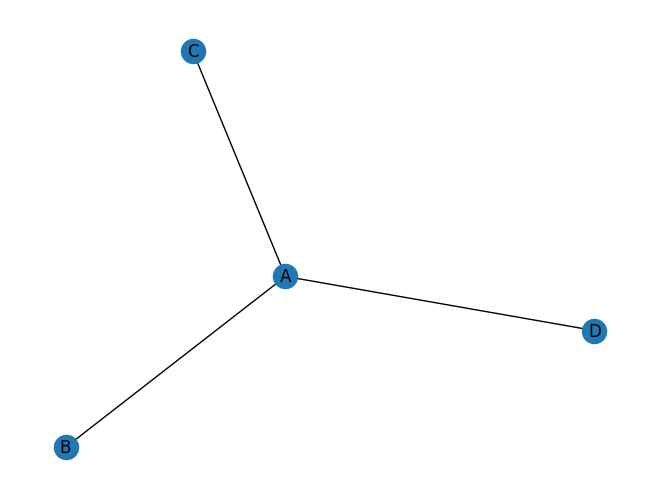

In [213]:
node = ['A', 'B', 'C', 'D']
edge = [('A','B'),('A','C'),('A','D')]

G2 = nx.Graph()

G2.add_nodes_from(node)
G2.add_edges_from(edge)
nx.draw(G2, with_labels=True)
#plt.show()
G2.degree